Project: Problem Statement - Personal Loan Campaign Modelling 
# _**Thera Bank Personal Loan Campaign**_
 
## **Data Description**:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.
 
## **Domain:**
Banking
 
## **Context:**
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.
## **Attribute Information:**
* ID: Customer ID
* Age: Customer's age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (\$000)
* ZIP Code: Home Address ZIP
* Family: Family size of the customer
* CCAvg: Avg. spending on credit cards per month (\$000)
* Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (\$000)
* Personal Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities Account: Does the customer have a securities account with the bank?
* CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Does the customer use internet banking facilities?
* Credit card: Does the customer use a credit card issued by the bank?
 
## **Learning Outcomes:**
* Exploratory Data Analysis
* Preparing the data to train a model
* Training and making predictions using a classification model
* Model evaluation
 
## **Objective:**
The classification goal is to predict the likelihood of a liability customer buying personal loans.
 
## **Steps and tasks:**
1.	Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (**5 marks**)
2.	EDA: Study the data distribution in each attribute and target variable, share your findings (**20 marks**)
* Number of unique in each column?
* Number of people with zero mortgage?
* Number of people with zero credit card spending per month?
* Value counts of all categorical columns.
* Univariate and Bivariate
* Get data model ready
3.	Split the data into training and test set in the ratio of 70:30 respectively (**5 marks**)
4.	Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)
5.	Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (**10 marks**)
6.	Give conclusion related to the Business understanding of your model? (**5 marks**)


1.	Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (**5 marks**)

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import math

np.set_printoptions(suppress = True)  # To avoid unnecessary engineering notation use later.

%matplotlib inline

In [2]:
#import dataset
input_file = 'Bank_Personal_Loan_Modelling.csv'
loan_df = pd.read_csv(input_file)

In [3]:
# check datatype
loan_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [4]:
#statistical summary
loan_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
# shape
loan_df.shape

(5000, 14)

In [6]:
#This will check the non-null count (and confirm the dtype from earlier)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
# There are no null values, but there are likely some incorrect data points.
#  We know from the data dictionary (and logic) that someone can't have negative years of experience.
print("How many days do we have data-entry errors for experience?")
len(loan_df[loan_df['Experience'] < 0])

How many days do we have data-entry errors for experience?


52

In [8]:
miskeyed_experience_rows = loan_df['Experience'] < 0

In [9]:
# Let's take a quick look at those rows to see what they look like
loan_df[miskeyed_experience_rows].head(12).style.hide_index()

ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
90,25,-1,113,94303,4,2.300000,3,0,0,0,0,0,1
227,24,-1,39,94085,2,1.700000,2,0,0,0,0,0,0
316,24,-2,51,90630,3,0.300000,3,0,0,0,0,1,0
452,28,-2,48,94132,2,1.750000,3,89,0,0,0,1,0
525,24,-1,75,93014,4,0.200000,1,0,0,0,0,1,0
537,25,-1,43,92173,3,2.400000,2,176,0,0,0,1,0
541,25,-1,109,94010,4,2.300000,3,314,0,0,0,1,0
577,25,-1,48,92870,3,0.300000,3,0,0,0,0,0,1
584,24,-1,38,95045,2,1.700000,2,0,0,0,0,1,0
598,24,-2,125,92835,2,7.200000,1,0,0,1,0,0,1


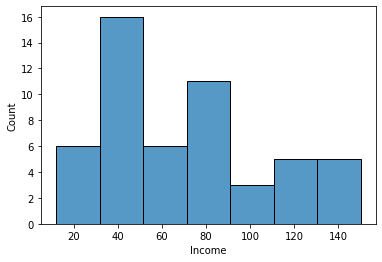

In [10]:
# I want to compare the distribution of the miskeyed experience group to the corretly-keyed experience group.
   #  I'll just focus on income.
# Mis-keyed group
sns.histplot(data = loan_df[miskeyed_experience_rows], x = 'Income');

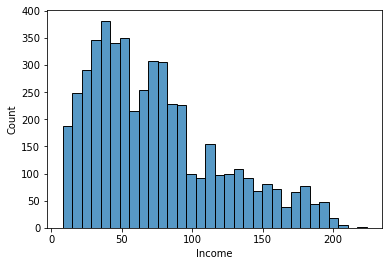

In [11]:
# I want to compare the distribution of the miskeyed experience group to the corretly-keyed experience group.
   #  I'll just focus on income.
# properly-keyed group
sns.histplot(data = loan_df[~miskeyed_experience_rows], x = 'Income');

In [12]:
# The distributions didn't look too different, but they didn't look identical either.
#   I want to statistically demonstrate that these distributions are similar enough so that mean
#    or median imputation would be acceptable.
from scipy.stats import ttest_ind
from scipy import stats

mean_wrong_experience_income = np.mean(loan_df[miskeyed_experience_rows]['Income'])
mean_right_experience_income = np.mean(loan_df[~miskeyed_experience_rows]['Income'])
std_right_experience_income = np.std(loan_df[miskeyed_experience_rows]['Income'])
std_wrong_experience_income = np.std(loan_df[~miskeyed_experience_rows]['Income'])
n_wrong = len(loan_df[miskeyed_experience_rows]['Income'])
n_right = len(loan_df[~miskeyed_experience_rows]['Income'])

ttest,pval = ttest_ind(loan_df[miskeyed_experience_rows]['Income'], loan_df[~miskeyed_experience_rows]['Income'])
print("p-value",pval) 
if pval < 0.05:
  print("we reject the null hypothesis")
else:
  print("we fail to reject the null hypothesis")

p-value 0.5462921495127853
we fail to reject the null hypothesis


In [13]:
# It looked OK, but I want to do a t-test by hand using the summary statistics to make certain.
  # Here are the summary 
print("right:  x_bar = {0}, std = {1}, n = {2}".format(mean_right_experience_income,
                                              std_right_experience_income,
                                              n_right))
print("wrong:  x_bar = {0}, std = {1}, n = {2}".format(mean_wrong_experience_income,
                                              std_wrong_experience_income,
                                              n_wrong))

right:  x_bar = 73.81447049312854, std = 37.58856897717016, n = 4948
wrong:  x_bar = 69.9423076923077, std = 46.10793565952266, n = 52


In [14]:
# t = (x1bar - x2bar)/(sp * sqrt((1/n1) + (1/n2)))
# sp = sqrt((((n1 - 1) * std1^2) + ((n2-1) * std2^2)) / (n1 + n2 - 2))
x1bar = float(mean_right_experience_income)
x2bar = float(mean_wrong_experience_income)
n1 = float(n_right)
n2 = float(n_wrong)
std1 = float(std_right_experience_income)
std2 = float(std_wrong_experience_income)
sp = np.sqrt((((n1 - 1) * (std1**2)) + ((n2-1) * (std2**2))) / (n1 + n2 - 2))
# print("std1 = {std1}; n1 = {n1}; std2 = {std2}; n2 = {n2}".format(std1 = std1,
#                                                                  n1 = n1,
#                                                                  std2 = std2,
#                                                                  n2 = n2))
# print("sp = {0}".format(sp))
t = (x1bar - x2bar)/(sp * np.sqrt((1/n1) + (1/n2)))
t

0.7370788854334387

In [15]:
pval = stats.t.sf(np.abs(t), n1+n2-2)*2  # two-sided pvalue = Prob(abs(t)>tt)
print('t-statistic = %6.3f pvalue = %6.4f' % (t, pval))

t-statistic =  0.737 pvalue = 0.4611


In [16]:
print("I note that the p-values are not identical, but since this was just an exercise \n to see if these distrbituiosn were similar enough for imputation \n and since both the by-hand and the automatic test point to the same conclusion, \n that it is OK to do imputation here because the distributions are close enough, \n I will end this statistics detour now.")

I note that the p-values are not identical, but since this was just an exercise 
 to see if these distrbituiosn were similar enough for imputation 
 and since both the by-hand and the automatic test point to the same conclusion, 
 that it is OK to do imputation here because the distributions are close enough, 
 I will end this statistics detour now.


In [17]:
mean_experience = loan_df['Experience'].mean()
median_experience = loan_df['Experience'].median()
print("There is almost no difference between the mean and median here.")
print(str(mean_experience - median_experience) + " years.")
print("So, I will use median since it is a whole number.")

There is almost no difference between the mean and median here.
0.10460000000000136 years.
So, I will use median since it is a whole number.


In [18]:
loan_df.loc[:, 'Experience'].replace({-1: median_experience, -2: median_experience, -3 : median_experience}, inplace = True)

In [19]:
print("If we have an empty dataframe here, then the imputation went off correctly.")
loan_df[loan_df['Experience'] < 0]

If we have an empty dataframe here, then the imputation went off correctly.


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


2.	EDA: Study the data distribution in each attribute and target variable, share your findings (**20 marks**)
* Number of unique in each column?

In [20]:
print("Here are the number of unique values in each column:\n")
pd.DataFrame(loan_df.nunique()).rename(columns={0: 'Number of Unique Values'})

Here are the number of unique values in each column:



,Number of Unique Values
ID,5000
Age,45
Experience,44
Income,162
ZIP Code,467
Family,4
CCAvg,108
Education,3
Mortgage,347
Personal Loan,2


* Number of people with zero mortgage?

In [21]:
print("Here are the number of people with no mortgage.")
np.sum(loan_df['Mortgage'] == 0)

Here are the number of people with no mortgage.


3462

Indeed, it looks like there is a large majority of customers who do not have a mortgage.


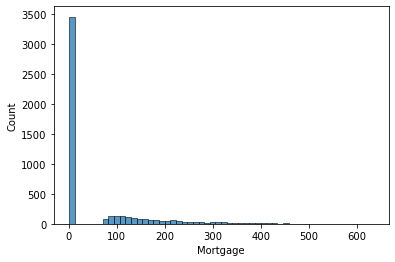

In [22]:
# That seems a little high, that 70% of people don't have a mortgage, so I'll look another way.
sns.histplot(data = loan_df, x = 'Mortgage');
print("Indeed, it looks like there is a large majority of customers who do not have a mortgage.")

* Number of people with zero credit card spending per month?

In [23]:
loan_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [24]:
print("Here are the number of people with zero credit card spending per month.")
np.sum(loan_df['CCAvg'] == 0)
print("That number seems about right (~2% of customers), so I'll dispense with further analysis here.")

Here are the number of people with zero credit card spending per month.
That number seems about right (~2% of customers), so I'll dispense with further analysis here.


* Value counts of all categorical columns.

In [25]:
print("First, we need to decide which columns should be categorical....")
pd.DataFrame(loan_df.dtypes).rename(columns = {0 : 'col_dtype'})

First, we need to decide which columns should be categorical....


,col_dtype
ID,int64
Age,int64
Experience,float64
Income,int64
ZIP Code,int64
Family,int64
CCAvg,float64
Education,int64
Mortgage,int64
Personal Loan,int64


In [26]:
columns_to_convert = ['ZIP Code', 'Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
print("These columns could be converted to category type without any loss of information:")
for col in columns_to_convert:
    print("\t" + col)

These columns could be converted to category type without any loss of information:
	ZIP Code
	Family
	Education
	Personal Loan
	Securities Account
	CD Account
	Online
	CreditCard


In [27]:
for col in columns_to_convert:
    loan_df[col] = loan_df[col].astype('category')

In [28]:
print("Let's verify that the changes went through.")
pd.DataFrame(loan_df.dtypes).rename(columns = {0 : 'col_dtype'})

Let's verify that the changes went through.


,col_dtype
ID,int64
Age,int64
Experience,float64
Income,int64
ZIP Code,category
Family,category
CCAvg,float64
Education,category
Mortgage,int64
Personal Loan,category


In [29]:
for col in columns_to_convert:
    print("Now looking at: ", col)
    print(loan_df[col].value_counts(normalize = True).to_frame())
    print("\n")

Now looking at:  ZIP Code
       ZIP Code
94720    0.0338
94305    0.0254
95616    0.0232
90095    0.0142
93106    0.0114
...         ...
92694    0.0002
94965    0.0002
94970    0.0002
91024    0.0002
9307     0.0002

[467 rows x 1 columns]


Now looking at:  Family
   Family
1  0.2944
2  0.2592
4  0.2444
3  0.2020


Now looking at:  Education
   Education
1     0.4192
3     0.3002
2     0.2806


Now looking at:  Personal Loan
   Personal Loan
0          0.904
1          0.096


Now looking at:  Securities Account
   Securities Account
0              0.8956
1              0.1044


Now looking at:  CD Account
   CD Account
0      0.9396
1      0.0604


Now looking at:  Online
   Online
1  0.5968
0  0.4032


Now looking at:  CreditCard
   CreditCard
0       0.706
1       0.294




* Univariate and Bivariate

In [30]:
non_cat_cols = loan_df.select_dtypes(exclude=['category']).columns  # Excluding categorical variables.
non_cat_cols = non_cat_cols[1:]  # removing the id column.
print("Here are the columns of interest:")
list(non_cat_cols)

Here are the columns of interest:


['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

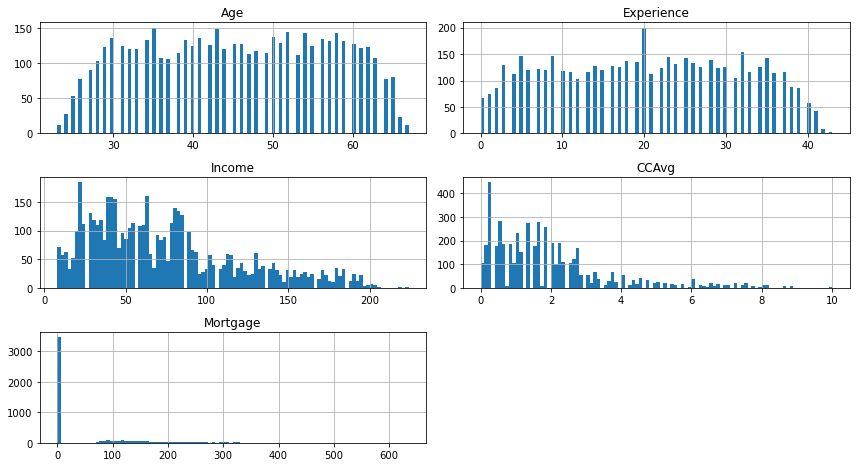

In [31]:
loan_df[non_cat_cols].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));
plt.tight_layout()
# Histograms

Nothing too exciting about these plots.
- Age mostly follows the expected population distribution (https://www.census.gov/content/dam/Census/newsroom/blogs/2016/06/americas-age-profile-told-through-population-pyramids/Chart-1.png), but there isn't much else interesting here.
- Experience is also not very interesting.  The only data point of interest is 20, but that is just because we oversatured that point when we did median imputation on the misspecified data.
- Income has some weird holes in it.  We'd also expect it to be more of a lognormal distribution than it is here (https://seekingalpha.com/article/3915436-income-inequality-is-american-way)
- CCAvg has sort of a negative-exponential or lognormal distribution.  It looks like there's a large spike around /$250 per month credit card spending; otherwise, there's nothing too interesting here.
- Mortgage has a vast majority of people without a mortage.  That large spike dwarfs and overshadows the rest of the distribution.

In [32]:
cat_cols = loan_df.select_dtypes(include=['category']).columns
cat_cols

Index(['ZIP Code', 'Family', 'Education', 'Personal Loan',
       'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

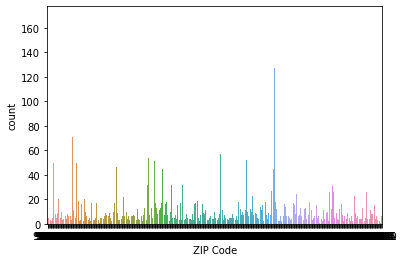

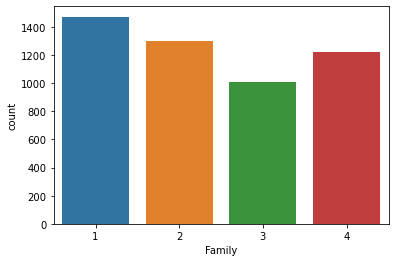

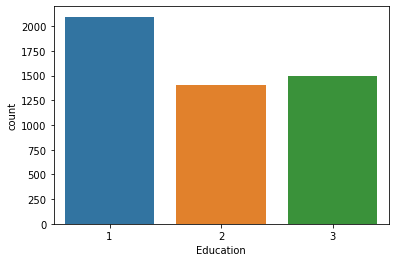

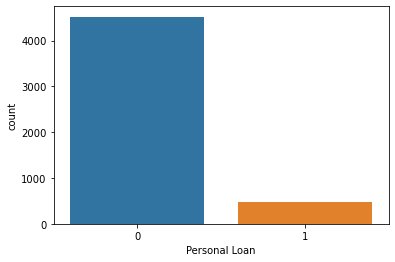

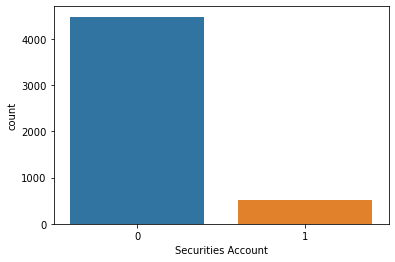

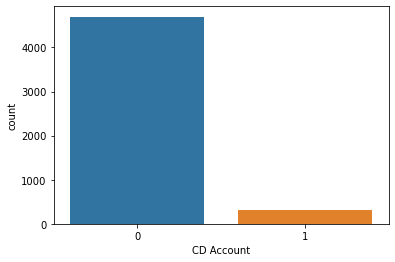

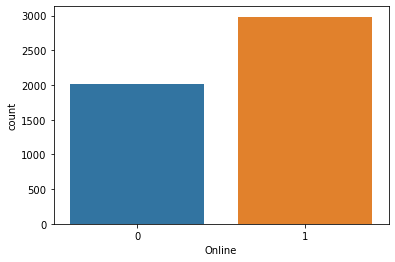

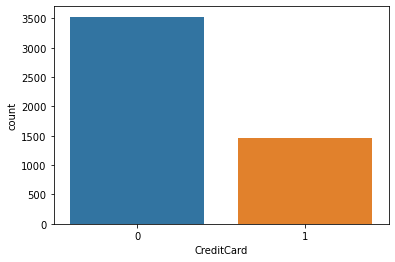

In [33]:
for col in cat_cols:
    sns.countplot(data = loan_df, x = col)
    plt.show()

### I will discuss Family, Education, Personal Loan, Securities Account, CD Account, Online, and CreditCard here.  I will save the ZIP code detour for the end of this univariate section.
- Family size does not seem too interesting.  There is a plurality of singleton households, but it is almost a uniform distribution (1000-1400 households in the 1, 2, 3, and 4-person household categories).  There are no 5+ person households in this data set.
- Education seems fake or at least biased compared to the base population of the United States.  (The largest group (according to the Census Bureau (https://www2.census.gov/programs-surveys/demo/tables/educational-attainment/2018/cps-detailed-tables/table-2-1.xlsx) is actually those without less than a Bachelor's degree at around 60% of the population.  Apparently without a college degree, one can't get an account at Thera Bank!)  In this data, most have a bachelor's, and then a near tie between graduate and professional degrees.
- Most don't have Personal Loans with Thera Bank.
- Most don't have Securities Accounts.
- Most don't have CD Accounts.
- Most use online banking facilities. (about 60%)
- Most don't use a credit card issued by the bank (about 30% do).

#### I realize that ZIP code isn't key to the analysis here, but I found the distribution of ZIP code interesting, so I did some further analysis anyway.
(Zip code detour starts here;  Feel free to scan past this section if grading this project.)

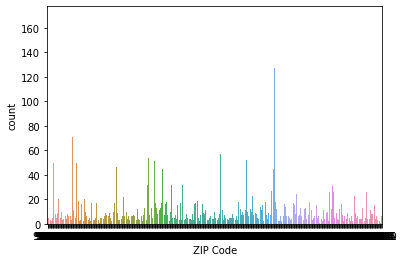

In [34]:
# I first got interested when I saw the weird spike in this plot.  I thought, "Where do that cluster of people live?"
sns.countplot(data = loan_df, x = 'ZIP Code');

In [35]:
zip_count = (loan_df[['ZIP Code', 'ID']]
    .groupby('ZIP Code')
    .count()
    .reset_index()
    .rename(columns={'ID':'customer_count'})
)

In [36]:
sort_by_variable = 'ZIP Code'
print("top 5 by {}".format(sort_by_variable))
zip_count.sort_values(by=sort_by_variable).head().style.hide_index()

top 5 by ZIP Code


ZIP Code,customer_count
9307,1
90005,5
90007,6
90009,8
90011,3


The first zip code matches "Armed Forces Europe" a zip code created so that family and friends of soldiers can send letters from the U.S. for the regular cost of postage even though it should cost more.

The other four all appear to be California.

In [37]:
sort_by_variable = 'ZIP Code'
print("top 5 by {}".format(sort_by_variable))
zip_count.sort_values(by=sort_by_variable, ascending = False).head().style.hide_index()

top 5 by ZIP Code


ZIP Code,customer_count
96651,6
96150,4
96145,1
96094,2
96091,4


The zip code '96651' is not an active U.S. zip code.  '966 51' is apparently a postal code in Slovakia.  And digging deep in the postal service website, I found that '96651; is a reserved APO/FPO zip code, but it is inactive.  https://about.usps.com/postal-bulletin/2002/html/pb22076/apofpo.html

The other four are all in California.

In [38]:
sort_by_variable = 'customer_count'
print("top 5 by {}".format(sort_by_variable))
zip_count.sort_values(by = sort_by_variable, ascending = False).head().style.hide_index()

top 5 by customer_count


ZIP Code,customer_count
94720,169
94305,127
95616,116
90095,71
93106,57


The top 5 are all cities of major universities in California.  (UC-Berkeley, Stanford, UC-Davis, UCLA, UC-Santa Barbara).

In [39]:
sort_by_variable = 'customer_count'
print("top 5 by {}".format(sort_by_variable))
zip_count.sort_values(by = sort_by_variable, ascending = True).head().style.hide_index()

top 5 by customer_count


ZIP Code,customer_count
9307,1
91024,1
94970,1
94965,1
92694,1


In [40]:
# To look at the zip codes more systematically, I will look at just the unique zip codes.
unique_zips = loan_df['ZIP Code'].unique()

In [41]:
# I found a package that will let us translate zip codes to their states
#! pip install uszipcode

In [67]:
from uszipcode import SearchEngine

In [70]:
SearchEngine(simple_zipcode=True).by_zipcode('20002')   

SimpleZipcode(zipcode='20002', zipcode_type='Standard', major_city='Washington', post_office_city='Washington, DC', common_city_list=['Washington'], county='District of Columbia', state='DC', lat=38.91, lng=-76.98, timezone='Eastern', radius_in_miles=2.0, area_code_list=['202'], population=52370, population_density=9961.0, land_area_in_sqmi=5.26, water_area_in_sqmi=0.22, housing_units=26166, occupied_housing_units=22973, median_home_value=428500, median_household_income=65000, bounds_west=-77.012513, bounds_east=-76.943858, bounds_north=38.92701, bounds_south=38.887588)

In [68]:
for zip_code in ['20002']:
    SearchEngine(simple_zipcode=False).by_zipcode(zip_code)   

In [43]:
# We can now look at the ZIP codes systematically to see what state each is from.  We can also see which ones are likely errors.
index_location = 0
for zip_code in unique_zips:
    try:
        this_state = SearchEngine(simple_zipcode=True).by_zipcode(zip_code).state_abbr
        print("at index_location {0}, zip_code {1} is in state {2}.".format(index_location, zip_code, this_state))
    except:
        print("at index_location {0}, zip_code {1} is not an active US zip code.".format(index_location, zip_code))
    index_location +=1

at index_location 0, zip_code 91107 is in state CA.
at index_location 1, zip_code 90089 is in state CA.
at index_location 2, zip_code 94720 is in state CA.
at index_location 3, zip_code 94112 is in state CA.
at index_location 4, zip_code 91330 is in state CA.
at index_location 5, zip_code 92121 is in state CA.
at index_location 6, zip_code 91711 is in state CA.
at index_location 7, zip_code 93943 is in state CA.
at index_location 8, zip_code 93023 is in state CA.
at index_location 9, zip_code 94710 is in state CA.
at index_location 10, zip_code 90277 is in state CA.
at index_location 11, zip_code 93106 is in state CA.
at index_location 12, zip_code 94920 is in state CA.
at index_location 13, zip_code 91741 is in state CA.
at index_location 14, zip_code 95054 is in state CA.
at index_location 15, zip_code 95010 is in state CA.
at index_location 16, zip_code 94305 is in state CA.
at index_location 17, zip_code 91604 is in state CA.
at index_location 18, zip_code 94015 is in state CA.
at 

## In conclusion, this zip code data is not very good.
- The only state it covers is California
- It has an unlikely APO, and it has several non-existent and inactive ZIP codes in it.
- The five most popular ZIP codes are all at university campuses.  Unless this data is generated by "Facebook users in 2005 (when Facebook was college-only)" or unless Thera Bank is geared towards college students, the most popular ZIP codes don't really make much sense.

### Bivariate Analysis

In [44]:
loan_df.columns.to_list()

['ID',
 'Age',
 'Experience',
 'Income',
 'ZIP Code',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal Loan',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

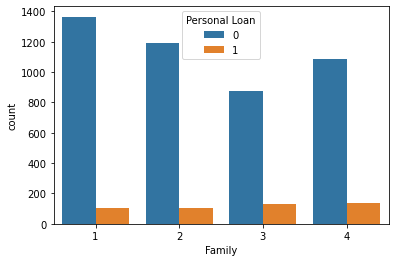

Family size does not seem to have much effect on personal loan.


In [45]:
x = 'Family'
y = 'Personal Loan'  # This will be used in the hue, but it is the dependent variable, y.
data = loan_df
sns.countplot(data = data, x = x, hue = y);
plt.show()
print("Family size does not seem to have much effect on personal loan.")  # There's a slight increase as the family size increases, but it is not dramatic.

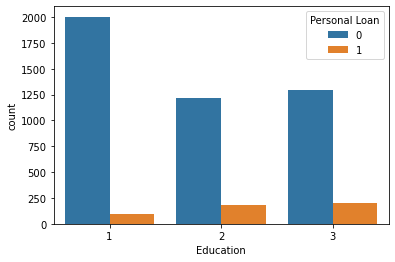

Education appears to increase the likelihood of getting a loan with Thera bank.


In [46]:
x = 'Education'
y = 'Personal Loan'  # This will be used in the hue, but it is the dependent variable, y.
data = loan_df
sns.countplot(data = data, x = x, hue = y);
plt.show()
print("Education appears to increase the likelihood of getting a loan with Thera bank.")

In [47]:
my_cols = loan_df.columns.to_list()
my_cols.remove('ID')
my_cols.remove('ZIP Code')
my_cols.remove('Personal Loan')
my_cols.remove('Mortgage') # just looked like a mess
my_cols.remove('CCAvg')   # just looked like a mess
my_cols

['Age',
 'Experience',
 'Income',
 'Family',
 'Education',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

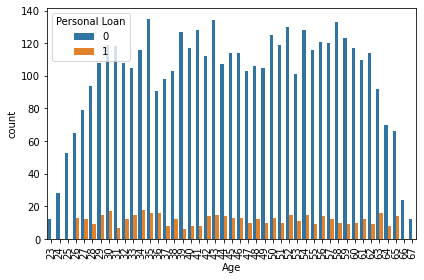

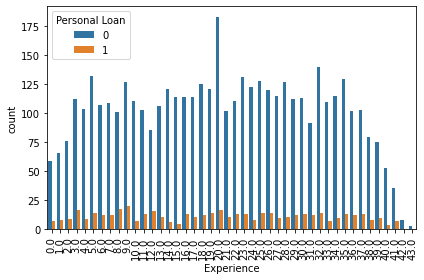

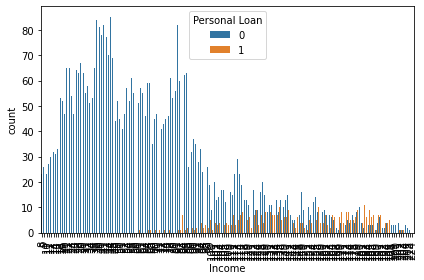

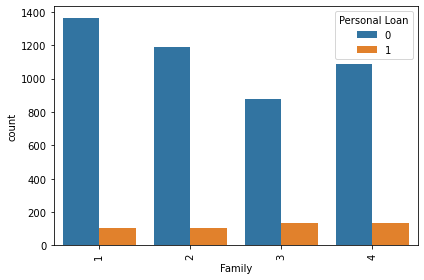

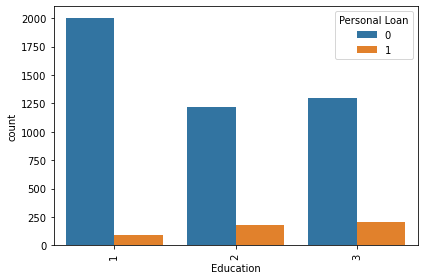

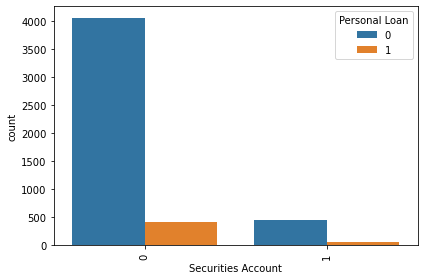

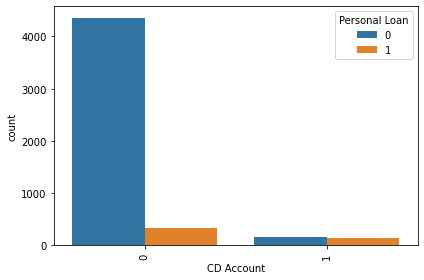

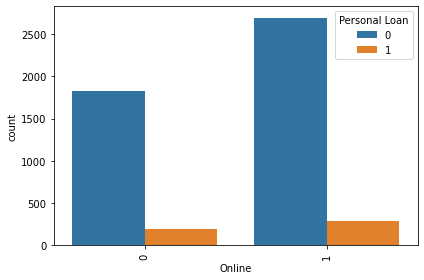

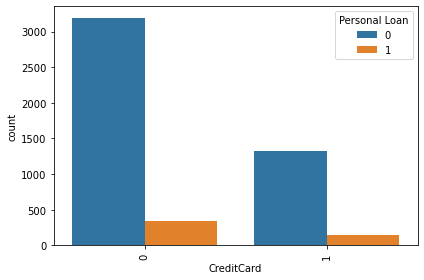

In [48]:
data = loan_df
y = 'Personal Loan'  # This will be used in the hue, but it is the dependent variable, y.
for col in my_cols:
    x = col
    sns.countplot(data = data, x = x, hue = y)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

I found interesting the relationship between income and the use of a personal loan.  Higher incomes seem to have higher likelihood of using a personal loan at Thera bank.  Nothing else really jumped out to me at this bivariate level of analyis.

* Get data model ready

In [49]:
## Define X and Y variables

X = loan_df.drop(columns = ['Personal Loan', 'ID', 'ZIP Code'])
Y = loan_df['Personal Loan'].astype('category')     

# change data typr to 'category' because it was object type which is not recognized by model

In [50]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

3.	Split the data into training and test set in the ratio of 70:30 respectively (**5 marks**)

In [51]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7)

4.	Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)

In [52]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state = 123, fit_intercept = True, solver = 'liblinear')  # (not sure if fit_intercept should stay false or = True;  Went with true because it had better results across the board.)
logreg.fit(X_train, y_train);                   # fit the model on train data

In [53]:
y_predict = logreg.predict(X_test)

In [54]:
## function to get confusion matrix in a proper format
#    I changed the default behavior of the confusion matrix to output as probabilities instead of counts.
def draw_cm(actual, predicted, normalize_parameter = 'all'):
    cm = confusion_matrix(actual, predicted, normalize = normalize_parameter)
    sns.heatmap(cm, annot=True,  fmt='.3f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Training accuracy 0.954

Testing accuracy 0.9613333333333334

Confusion Matrix (in probabilities instead of counts)


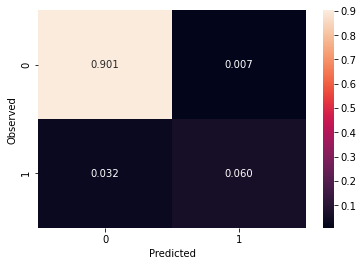

None

Recall: 0.6521739130434783

Precision: 0.9

F1 Score: 0.7563025210084033

Roc Auc Score: 0.9732596990785077


In [55]:
print("Training accuracy", logreg.score(X_train, y_train))  
print()
print("Testing accuracy", logreg.score(X_test, y_test))
print()
print('Confusion Matrix (in probabilities instead of counts)')
print(draw_cm(y_test, y_predict))  # This makes the confusion matrix.
print()
print("Recall:", recall_score(y_test, y_predict))
print()
print("Precision:", precision_score(y_test, y_predict))
print()
print("F1 Score:", f1_score(y_test, y_predict))
print()
print("Roc Auc Score:", roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]))

5.	Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (**10 marks**)

In [56]:
# "Find out coefficients of all the attributes and show the output in a data frame with column names"
## Feature Importance or Coefficients   (Coefficients of all the attributes)
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(logreg.coef_[0]),2)
fi = fi.append([{'Col': 'Intercept','Coeff' : logreg.intercept_[0]}])  # This line adds the intercept.
fi.sort_values(by = 'Coeff', ascending=False).reset_index().drop(columns='index').style.hide_index()

Col,Coeff
Education_3,2.910000
CD Account_1,2.900000
Education_2,2.720000
Family_3,1.370000
Family_4,1.290000
CreditCard_1,0.860000
Online_1,0.600000
Securities Account_1,0.560000
Family_2,0.340000
CCAvg,0.160000


In [57]:
# Observe the predicted and observed classes in a dataframe.
#  For test data show all the rows where the predicted class is not equal to the observed class.

z = X_test.copy()
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_predict
cols = z.columns.to_list()    # columns as they are
cols = cols[-2:] + cols[:-2]  # Moving observed and predicted loan status columns to front of dataframe.
z = z[cols]
z.head(5).style.hide_index()

Observed Loan Status,Predicted Loan Status,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1
0,0,42,12.000000,34,2.000000,0,0,1,0,0,1,0,0,0,1
0,0,52,28.000000,81,1.800000,0,0,1,0,1,0,1,0,0,0
0,0,58,28.000000,70,1.400000,0,0,0,0,0,1,0,0,0,0
0,0,28,4.000000,80,2.500000,0,0,1,0,0,0,0,0,1,0
0,0,60,35.000000,39,1.600000,0,1,0,0,0,1,0,0,1,0


In [58]:
false_positives = z[(z['Predicted Loan Status'] == 1) & (z['Observed Loan Status'] == 0)]
print("There are {0} false positives.".format(len(false_positives)))
false_positives[0:5]

There are 10 false positives.


,Observed Loan Status,Predicted Loan Status,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1
459,0,1,35,10.0,200,3.00,458,1,0,0,0,0,0,0,0,0
4285,0,1,23,20.0,149,7.20,0,1,0,0,0,0,0,0,1,0
909,0,1,23,20.0,149,6.33,305,0,0,0,0,0,0,0,0,1
89,0,1,25,20.0,113,2.30,0,0,0,1,0,1,0,0,0,1
932,0,1,51,27.0,112,1.80,0,0,1,0,1,0,1,1,1,1


In [59]:
false_negatives = z[(z['Observed Loan Status'] == 1) & (z['Predicted Loan Status'] == 0)]
print("There are {0} false negatives.".format(len(false_negatives)))
false_negatives[0:5]

There are 48 false negatives.


,Observed Loan Status,Predicted Loan Status,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1
4575,1,0,53,27.0,115,0.5,0,1,0,0,0,1,0,0,0,0
78,1,0,54,30.0,133,2.6,0,1,0,0,0,1,0,0,0,0
3383,1,0,46,22.0,135,4.1,213,0,1,0,0,0,0,0,1,0
2304,1,0,27,2.0,170,4.7,0,0,1,0,0,0,0,0,1,0
1731,1,0,43,19.0,125,2.4,0,0,1,0,0,0,0,0,1,0


In [60]:
print("Here are all the misclassified rows.\n")
pd.concat([false_positives, false_negatives])

Here are all the misclassified rows.



,Observed Loan Status,Predicted Loan Status,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1
459,0,1,35,10.0,200,3.00,458,1,0,0,0,0,0,0,0,0
4285,0,1,23,20.0,149,7.20,0,1,0,0,0,0,0,0,1,0
909,0,1,23,20.0,149,6.33,305,0,0,0,0,0,0,0,0,1
89,0,1,25,20.0,113,2.30,0,0,0,1,0,1,0,0,0,1
932,0,1,51,27.0,112,1.80,0,0,1,0,1,0,1,1,1,1
4225,0,1,43,18.0,204,8.80,0,1,0,0,0,0,0,0,1,0
785,0,1,46,22.0,164,7.60,0,1,0,0,0,0,0,1,1,1
740,0,1,52,27.0,195,8.10,0,0,0,0,0,0,0,0,0,0
540,0,1,25,20.0,109,2.30,314,0,0,1,0,1,0,0,1,0
2684,0,1,30,5.0,98,1.80,129,0,0,1,0,1,1,1,1,1


6.	Give conclusion related to the Business understanding of your model? (**5 marks**)

In [61]:
print("In order to understand the model, we should look at the coefficients again and look at their relative importance.")
fi.sort_values(by = 'Coeff', ascending=False).reset_index().drop(columns='index').style.hide_index()

In order to understand the model, we should look at the coefficients again and look at their relative importance.


Col,Coeff
Education_3,2.910000
CD Account_1,2.900000
Education_2,2.720000
Family_3,1.370000
Family_4,1.290000
CreditCard_1,0.860000
Online_1,0.600000
Securities Account_1,0.560000
Family_2,0.340000
CCAvg,0.160000


The business takeaway from the probability exploration is that Thera Bank is doing a pretty good job with its current business model.  Since doctoral education and larger families are both key features in predicting whether or not someone gets a loan with us, Thera Bank, I think the prevalence that we found of so many institutions of higher education in our customer-by-zip-code exploration shows that we are doing a pretty good job of targeting our most likely customers.  If we need to shift our focus, I'd recommend that we focus our efforts in neighborhoods and communities where upper-level graduate students and professors are more likely to reside and away from undergraduate-only heavy areas.  This may require some more refined data than the ZIP Code data we were working with earlier.

We also should target our CD customers.  This makes sense because certificate of deposit investors are generally more risk averse and have longer-term time horizons of interest which also corresponds to most of our loan products.

#### Here's an alternative way to do the logit model here using statsmodel.api instead.
##### The results are not identical
###### I'm going to comment out the statmodel.api work below but just leave the code there for a future project or in case I need to use a non-scikit-learn option in the future.

In [62]:
# print("As a bonus, trying statsmodel.api here as well.")
# import statsmodels.api as sm

# logit = sm.Logit(y_train, sm.add_constant(X_train))
# lg = logit.fit()
# lg.summary()

#### Here's where I started to go down the rabbit hole of transforming the logit coefficients into probabilities before pulling myself out of there.  Leaving this for myself as a future exercise or as a starting place in case I decide I need to do this somewhere else in the future.

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

In [63]:
# print("One thing we can do to help with business understanding of the model is to interpret those coefficents.")

In [64]:
# # Borrowed this from here (https://sebastiansauer.github.io/convert_logit2prob/) and converted from R to Python.
# print("This function will get us from the log of odds to a probability instead for each value.")

# def logit2prob(logit):
#   odds = math.exp(logit)
#   prob = odds / (1 + odds)
#   return(prob)

In [65]:
# print("Applying our new function to the logit coefficients gives us the probabilities.")
# print("We can see that the having the highest level of education is highly associated with getting a loan from Thera Bank")
# fi['prob'] = fi['Coeff'].apply(lambda x: logit2prob(x))
# fi.reset_index().drop(columns ='index').sort_values(by = 'prob', ascending = False).style.hide_index()